In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [76]:
from numpy.linalg import norm

In [160]:
a = plt.get_cmap('plasma')

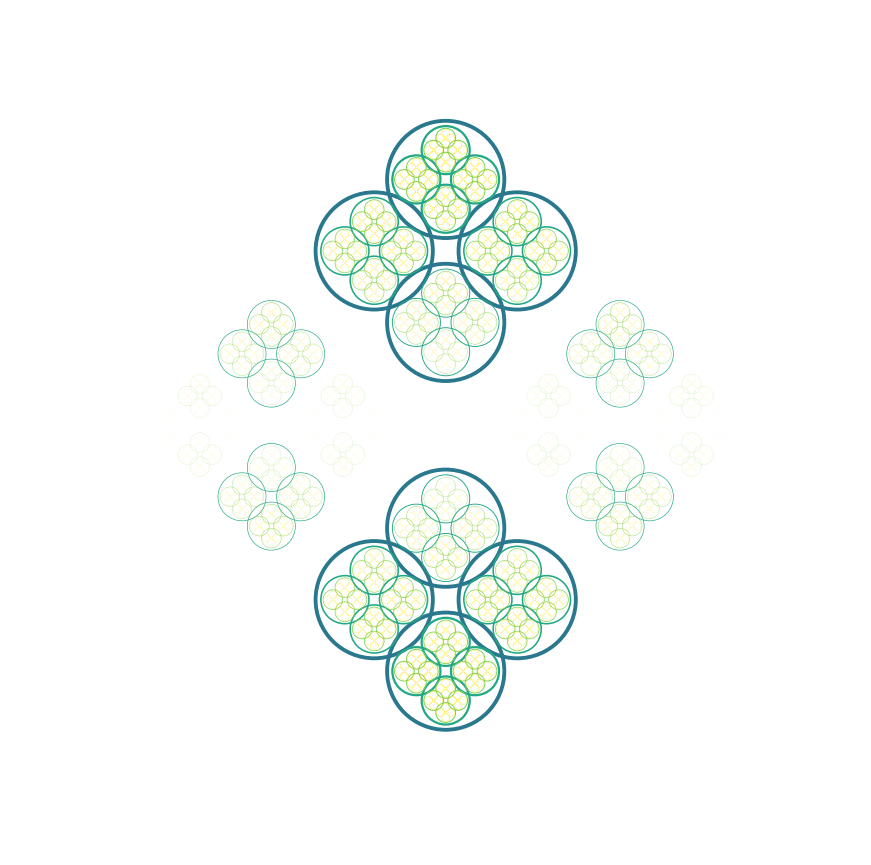

In [209]:
# Circular fractal - four circles
DEPTH = 5
n_elements = sum(map(lambda d: 4**d, range(DEPTH+1)))
colors = iter(plt.get_cmap('viridis').colors[i] for i in np.linspace(0, 255, DEPTH+1).astype(int))

initial_element = {'xy':(0.5, 0.5), 'diam':1, 'lw':7, 'c':next(colors)}
elements = [[initial_element]]
signs = [(-1, 0), (1, 0), (0, -1), (0, 1)]

for i in range(DEPTH):
    children = []
    color = next(colors)
    for parent in elements[-1]: # For each element in the level above
        (ox, oy) = parent['xy']
        unit = 0.25*parent['diam'] 
        children = children + [{'xy':(ox+signx*unit, oy+signy*unit),
                                'diam':unit*1.64,
                                'c':color,
                                'lw':150*unit*abs(oy - 0.5)} for signx, signy in signs]
    elements.append(children)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, aspect='equal')
for level in elements[1:]:
    for element in level:
        ax.add_patch(
            patches.Ellipse(
            element['xy'], # (x,y)
            element['diam'], # width
            element['diam'], # height
            linewidth=element['lw'],
            color=element['c'],
            fill=False
            )
        )
ax.axis('off')
ax.set_ylim(-.1, 1.1); ax.set_xlim(-.1, 1.1);